<a href="https://colab.research.google.com/github/Yevhenii-Taran-9/Machine-Learning/blob/main/%D0%A2%D0%B0%D1%80%D0%B0%D0%BD_%D0%BF%D1%80_2_%D0%B7%D0%B0%D0%B2%D0%B4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import requests

# Завдання 2
**Автор:** **Таран Євгеній** ФІТ 4-9

**Був присутній на парі**

Обробка та аналіз даних про ВВП країн. Датасет було отримано з Вікіпедії з  використанням бібіліотеки Pandas.

1. Вивести перші 5 рядків датасета

In [55]:
url = "https://raw.githubusercontent.com/Yevhenii-Taran-9/Machine-Learning/refs/heads/main/titanic.csv"
csv_text = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text

from io import StringIO
df = pd.read_csv(StringIO(csv_text))

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

2. Визначити розмір датасета

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


3. Визначити тип даних.

In [58]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


4. Визначити наявність пропущених значень. При наявності, замінити
пропущені значення на середнє значення.

In [59]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [61]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.mean()))

5.  Ще раз перевірити наявність пропущених значень.

In [62]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


6. Перевірити наявність дублікатів. При наявності видалити дублікати.

In [63]:
df.duplicated().sum()

np.int64(0)

7. Вивести описову статистику датасету describe()

In [64]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


8.  Видалити стовпчик Cabin

In [65]:
df = df.drop(columns=['Cabin'])

print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Embarked  
0   330911   7.8292        Q  
1   363272   7.0000        S  
2   240276   9.6875        Q  
3   315154   8.6625        S  
4  3101298  12.2875        S  


9. Сформувати датасет з обраними стовпцями:
['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

In [66]:
selected_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
df_selected = df[selected_cols]

print(df_selected.head())

   Survived  Pclass     Sex   Age     Fare
0         0       3    male  34.5   7.8292
1         1       3  female  47.0   7.0000
2         0       2    male  62.0   9.6875
3         0       3    male  27.0   8.6625
4         1       3  female  22.0  12.2875


10. Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні значення даного стовпчика).

In [67]:
print("Унікальні значення у стовпці 'Sex':", df['Sex'].unique())
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

df

Унікальні значення у стовпці 'Sex': ['male' 'female']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,S


11. Ще раз перевірити кількість пропущених даних (впевнитись, що їх
немає).

In [68]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


12. Вивести 5 перших рядків датасету.

In [69]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S


13. Вивести 5 останніх рядків датасету.

In [70]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
413,1305,0,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,S
417,1309,0,3,"Peter, Master. Michael J",0,30.27259,1,1,2668,22.3583,C


14. Аналіз виживання залежно від статі: Обчисліть відсоток виживання
для кожної статі. Чи була різниця у виживанні між чоловіками та
жінками?


In [71]:
survival_rate = df.groupby('Sex')['Survived'].mean() * 100

survival_rate

,Survived
Sex,
0,0.0
1,100.0


15. Обчисліть відсоток виживання для кожного класу (Pclass). Який
клас мав найвищий рівень виживання (дати відповідь)?

In [74]:
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print(survival_by_class)
best_class = survival_by_class.idxmax()

print(f"Найвищий рівень виживання у класі: {best_class}")

Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64
Найвищий рівень виживання у класі: 1


16. Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи
впливає вік на виживання (дати відповідь)?


In [78]:
average_age = df.groupby('Survived')['Age'].mean()
average_age

,Age
Survived,
0,30.272699
1,30.272400


17. Розподіліть пасажирів на групи за рівнями тарифів (Fare) і
обчисліть рівень виживання для кожної групи. Як тариф впливав на
шанси виживання (дати відповідь)?

In [77]:
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['Low','Medium','High','Very High'])
survival_by_fare = df.groupby('FareGroup')['Survived'].mean() * 100

survival_by_fare

/tmp/ipython-input-2597972960.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare = df.groupby('FareGroup')['Survived'].mean() * 100


,Survived
FareGroup,
Low,26.315789
Medium,27.083333
High,39.047619
Very High,53.398058


18. Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного
класу (Pclass). Чи існує значна різниця у тарифах між класами (дати
відповідь)?

In [80]:
average_fare_by_class = df.groupby('Pclass')['Fare'].mean()
average_fare_by_class

,Fare
Pclass,
1,94.280297
2,22.202104
3,12.565951


19.  Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік
пасажирів розподіляється за класами (дати відповідь)?

In [81]:
average_age_by_class = df.groupby('Pclass')['Age'].mean()

average_age_by_class

,Age
Pclass,
1,40.022928
2,28.857881
3,26.090397


20. Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто не вижив. Чи є видимі відмінності у вікових групах (дати відповідь)?

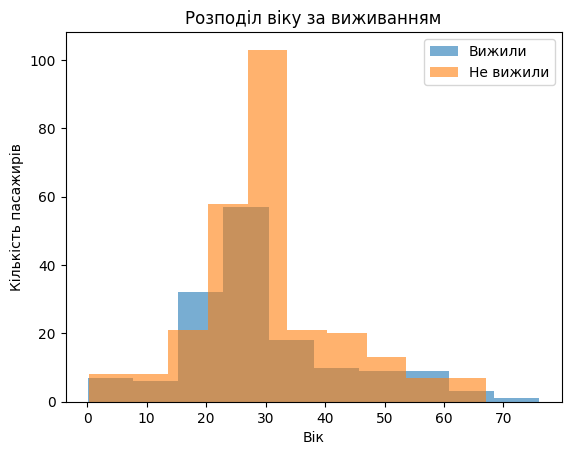

In [82]:
import matplotlib.pyplot as plt

plt.hist(df[df['Survived']==1]['Age'], bins=10, alpha=0.6, label='Вижили')
plt.hist(df[df['Survived']==0]['Age'], bins=10, alpha=0.6, label='Не вижили')
plt.xlabel('Вік')
plt.ylabel('Кількість пасажирів')
plt.title('Розподіл віку за виживанням')
plt.legend()
plt.show()

Чітко бачимо що у віці 25 - 30 років маємо найбільше людей які вижили, а людей у віці близько 20 років взагалі вижило більше ніж загинуло.

21. Обчисліть відсоток виживання для кожної комбінації статі та класу
(наприклад, жінки в 1-му класі, чоловіки в 3-му класі). Яка група
мала найвищий рівень виживання (дати відповідь)

In [84]:
survival_by_sex_class = df.groupby(['Sex','Pclass'])['Survived'].mean() * 100
print(survival_by_sex_class)

best_group = survival_by_sex_class.idxmax()
print(f"Найвищий рівень виживання у групі: Стать={best_group[0]}, Клас={best_group[1]}")

Sex  Pclass
0    1           0.0
     2           0.0
     3           0.0
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64
Найвищий рівень виживання у групі: Стать=1, Клас=1


22. Обчисліть кореляцію між усіма числовими змінними (Survived,
Pclass, Age, Fare). Які змінні найбільш сильно корелюють з
виживанням (дати відповідь)?

In [86]:
numeric_cols = ['Survived','Pclass','Age','Fare']
correlation = df[numeric_cols].corr()
print(correlation)

surv_corr = correlation['Survived'].drop('Survived').sort_values(ascending=False)
print("Кореляція з виживанням:")
print(surv_corr)

          Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.440782 -0.576619
Age      -0.000011 -0.440782  1.000000  0.326800
Fare      0.191382 -0.576619  0.326800  1.000000
Кореляція з виживанням:
Fare      0.191382
Age      -0.000011
Pclass   -0.108615
Name: Survived, dtype: float64


У роботі було завантажено CSV-датасет, перетворено категоріальні дані й виконано базовий статистичний аналіз. Встановлено, що на виживання найбільше впливали стать, клас і тариф: жінки та пасажири 1-го класу мали найвищі шанси вижити, а високий тариф пов’язаний із кращим результатом. Вік впливав слабше. Робота показала, як за допомогою Python можна ефективно аналізувати дані та знаходити ключові залежності.